# Project Title : Yearly UCSD Application Rate and League Table Linear Regression Model
Authors: 
Thanh Luong
Abigail Han
Saroop Samra
Amy Nguyen

**Instructions**

In this document, include text and code to walk users through your analysis. Feel free to add more cells as you go, but try to keep the five sections provided in order as they are. Feel free to add subsections within each section to organize your project. 

Be sure to change the title and include authors in the first cell.

When finished, download as a PDF and submit the PDF on Gradescope for extra credit. Be sure to include all gorup members. There are up to 15 points extra credit, so even if you don't complete the whole project, completing part of this document will likely earn you some extra credit.

# Question
Is there a valid SIMPLE linear regression with US News Rankings and Yearly UCSD Application Rate?
What does a visualization of this look like?
What is the pearson correlation factor?


Is there a valid MULTIPLE linear regression with US News Rankings and Times Score and Yearly UCSD Application Rate?
What does a visualization of this look like?
What is the pearson correlation factor?

# Data

Include the code to read your dataset in below and briefly explain what information is included in your dataset that you'll use for analysis.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

my_data = np.loadtxt('ec_data.txt',delimiter=',',dtype=float)
np.set_printoptions(suppress=True)
print(my_data)

[[ 1996.      43.       0.   23687.       0.  ]
 [ 1997.      34.       0.   25098.       5.96]
 [ 1998.      33.       0.   28090.      11.92]
 [ 1999.      32.       0.   32541.      15.85]
 [ 2000.      32.       0.   35693.       9.69]
 [ 2001.      31.       0.   38188.       6.99]
 [ 2002.      31.       0.   41346.       8.27]
 [ 2003.      31.       0.   43443.       5.07]
 [ 2004.      32.       0.   41524.      -4.42]
 [ 2005.      35.       0.   40534.      -2.38]
 [ 2006.      32.       0.   43591.       7.54]
 [ 2007.      38.       0.   45088.       3.43]
 [ 2008.      38.       0.   47385.       5.09]
 [ 2009.      35.       0.   47060.      -0.69]
 [ 2010.      35.       0.   48098.       2.21]
 [ 2011.      35.      73.2  53449.      11.13]
 [ 2012.      37.      73.   60832.      13.81]
 [ 2013.      38.      75.2  67391.      10.78]
 [ 2014.      39.      67.4  73448.       8.99]
 [ 2015.      37.      68.6  78061.       6.28]
 [ 2016.      39.      72.2  84206.     

<h3> Data Sources for attempted Sentimental Analysis</h3>
<p> First data source is the training data used to get the probabilities of sentiment given certain words.
    The second data source is a News Article on UCSD which we web scraped.</p>

In [119]:
import pandas as pd
from nltk.stem import PorterStemmer #for stemming words

# training data from CMU's CSE class: http://boston.lti.cs.cmu.edu/classes/95-865-K/HW/HW3/
twitter_sent = pd.read_csv("twitter_sentiment.csv")

twitter_sent.head()

#Splice the words in each column to remove the short words and stem
def filter_col(text_col):
    spliced = text_col.split(" ")
    filtered = list(filter(remove_short, spliced))
    return filtered

#remove words that are theoretically too short to mean much, usernames, and hashtags
def remove_short(word):
    if len(word) <= 3 or "@" in word or "#" in word:
        return False
    return True

#get the stem for same meaning words
stemmer = PorterStemmer()
filtered_cols = twitter_sent['text'].apply(filter_col)
twitter_sent['text'] = filtered_cols.apply(lambda col: [stemmer.stem(word) for word in col])

probs = {}

row_count = twitter_sent.shape[0]
# iterate through all of the rows in the training data
for i in range(row_count):
    col = twitter_sent['class']
    col2 = twitter_sent['text']
    emo = str(col[i])
    txt = list(col2[i])
    
    # gets the count of the emotions for every single word in text
    for i in range(len(txt)):
        spliced = txt[i]
        word = probs.get(spliced)
        if word:
            if word.get(emo):
                word[emo] += 1
            else:
                word[emo] = 1
        else:
            probs[spliced] = {}
            probs[spliced][emo] = 1
print(probs)


{'swype': {'Pos': 1}, 'iphon': {'Pos': 30, 'Neg': 45}, 'will': {'Pos': 9, 'Neg': 10}, 'crack.': {'Pos': 1}, 'that': {'Pos': 7, 'Neg': 34}, 'ad': {'Pos': 1}, 'more': {'Pos': 3, 'Neg': 5}, 'carrier': {'Pos': 1}, 'support': {'Pos': 3, 'Neg': 2}, '(just': {'Pos': 1}, 'announced)': {'Pos': 1}, 'hilari': {'Pos': 1}, 'video': {'Pos': 2}, 'doe': {'Pos': 2, 'Neg': 8}, 'duet': {'Pos': 1}, 'with': {'Pos': 15, 'Neg': 50}, 'siri.': {'Pos': 2, 'Neg': 2}, 'pretti': {'Pos': 3, 'Neg': 2}, 'much': {'Pos': 2, 'Neg': 5}, 'sum': {'Pos': 1}, 'love': {'Pos': 26, 'Neg': 3}, 'affair!': {'Pos': 1}, 'http://t.co/8exbnqji': {'Pos': 1}, 'made': {'Pos': 4, 'Neg': 8}, 'easi': {'Pos': 1}, 'switch': {'Pos': 2}, 'iphone.': {'Pos': 2, 'Neg': 4}, 'just': {'Pos': 11, 'Neg': 33}, 'realiz': {'Pos': 1}, 'reason': {'Pos': 1}, 'into': {'Pos': 1, 'Neg': 4}, 'twitter': {'Pos': 4, 'Neg': 1}, 'ios5': {'Pos': 6, 'Neg': 12}, 'thank': {'Pos': 31, 'Neg': 12}, 'current': {'Pos': 3}, 'user': {'Pos': 2, 'Neg': 2}, 'littl': {'Pos': 4, 'Ne

In [116]:
import urllib.request
from bs4 import BeautifulSoup

# Web scraped an article for text (sentiment analysis)

# I consulted these articles:     
#       https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
#       https://www.geeksforgeeks.org/reading-selected-webpage-content-using-python-web-scraping/

strrr = ""
req = urllib.request.Request('http://triton.news/2019/11/ucsd-professor-tom-wong-to-announce-run-for-congress-tomorrow/')

with urllib.request.urlopen(req) as response:
    the_page = response.read()
    soup=BeautifulSoup(the_page,'html.parser')
    l=soup.findAll("p")
    for i in l:
        strrr += str(i)
    txt_lst = strrr.split(" ")

print(txt_lst[:150])

#TO DO: get rid of short words, uses Naive Bayes formula to 
# compute the probability of negative, positive, or neutral sentiment given words in text (only use words that are
# found in the twitter training dataset)
    

['<p', 'class="meta', 'post-meta', 'clearfix"><span', 'class="updated', 'meta-date"><i', 'class="fa', 'fa-calendar"></i>November', '19,', '2019</span><span', 'class="vcard', 'author', 'meta-author"><span', 'class="fn"><i', 'class="fa', 'fa-user"></i><a', 'href="http://triton.news/author/mo/"', 'rel="author"', 'title="Posts', 'by', 'Mo', 'Elew">Mo', 'Elew</a></span></span><span', 'class="meta-tags"><i', 'class="fa', 'fa-tag"></i><a', 'href="http://triton.news/category/news/local/"', 'rel="category', 'tag">Local</a>,', '<a', 'href="http://triton.news/category/news/"', 'rel="category', 'tag">News</a></span><span', 'class="meta-comments"><i', 'class="fa', 'fa-comment-o"></i><span', 'class="dsq-postid"', 'data-dsqidentifier="28835', 'http://triton.news/?p=28835">0</span></span>\n</p><p>UC', 'San', 'Diego', 'Political', 'Science', 'Professor', 'Tom', 'Wong', 'plans', 'to', 'announce', 'his', 'campaign', 'for', 'San', 'Diego’s', '53rd', 'Congressional', 'District', 'on', 'November', '20,', 'a

# Data Wrangling

Include text and code needed to wrangle your data into a tidy data format. If your data are already in a usable format, explain what checks you did on the data (and include the code) to ensure that the data were tidy:

Prepare data for simple linear regression : Year, US New Score, Yearly Applicant Rate
  We will drop the Number of Applicants, Times Score columns 
  
Prepare data for multiple linear regression : Year, US New Score, Times Score, Yearly Applicant Rate
  We will drop the Number of Applicants
  We will drop all Rows where the Times Score is zero (data was unavailable)
  

In [9]:
# Simple Linear Regression Data: Drop the Year, Number of Applicants, Times Score columns
simple_linear_regress_data = np.delete(my_data, [0, 2,3], 1)
print("Simple Linear Regression Data")
print(simple_linear_regress_data)

# Multiple Linear Regression Data: Drop the Year, Number of Applicant columns
#                                  Drop All Rows where Times Score is Zero
multiple_linear_regress_data = np.delete(my_data, [0, 3], 1)
multiple_linear_regress_data = multiple_linear_regress_data[multiple_linear_regress_data[:,1] != 0.0]
print("Multiple Linear Regression Data")
print(multiple_linear_regress_data)

Simple Linear Regression Data
[[43.    0.  ]
 [34.    5.96]
 [33.   11.92]
 [32.   15.85]
 [32.    9.69]
 [31.    6.99]
 [31.    8.27]
 [31.    5.07]
 [32.   -4.42]
 [35.   -2.38]
 [32.    7.54]
 [38.    3.43]
 [38.    5.09]
 [35.   -0.69]
 [35.    2.21]
 [35.   11.13]
 [37.   13.81]
 [38.   10.78]
 [39.    8.99]
 [37.    6.28]
 [39.    7.87]
 [44.    5.04]
 [42.   10.68]]
Multiple Linear Regression Data
[[35.   73.2  11.13]
 [37.   73.   13.81]
 [38.   75.2  10.78]
 [39.   67.4   8.99]
 [37.   68.6   6.28]
 [39.   72.2   7.87]
 [44.   73.2   5.04]
 [42.   78.7  10.68]]


# Data Analysis

Include text and code to explore and analyze the data your group used for your final project.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.08631
Date:                Mon, 09 Dec 2019   Prob (F-statistic):              0.772
Time:                        07:04:14   Log-Likelihood:                -69.636
No. Observations:                  23   AIC:                             143.3
Df Residuals:                      21   BIC:                             145.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4822     10.267      0.924      0.3

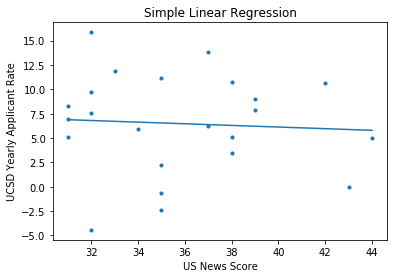

[[35.  73.2]
 [37.  73. ]
 [38.  75.2]
 [39.  67.4]
 [37.  68.6]
 [39.  72.2]
 [44.  73.2]
 [42.  78.7]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     3.416
Date:                Mon, 09 Dec 2019   Prob (F-statistic):              0.116
Time:                        07:04:14   Log-Likelihood:                -15.773
No. Observations:                   8   AIC:                             37.55
Df Residuals:                       5   BIC:                             37.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

C:\Users\Manpreet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [10]:
X = simple_linear_regress_data[:,0]
Y = simple_linear_regress_data[:,1]
results = sm.OLS(Y,sm.add_constant(X)).fit()
print(results.summary())
plt.scatter(X, Y, s=np.pi*3)
plt.title('Simple Linear Regression')
plt.xlabel('US News Score')
plt.ylabel('UCSD Yearly Applicant Rate')
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.show()

X = np.delete(multiple_linear_regress_data, [2], 1)
Y = multiple_linear_regress_data[:,2]
print(X)
results = sm.OLS(Y,sm.add_constant(X)).fit()
print(results.summary())

# Programming Experience

In this section, include information about your team's level of exprience programming in Python. Discuss briefly what new things (concepts, skills, packages, etc.) you learned by completing this extra credit.

<p>Three of the members have had Python programming experiance and are Data Science Majors (2 sophmores and 1 freshman). Some of us have taken DSC10 and DSC20 courses. However, we all needed refreshes as it was a while ago that some of us last wrote Python We also learned the new API: statsmodels. We didnt use this in our prior classes. We used this to perform simple and multiple linear regression. We also did lots of Google searches, this was useful to learn how to plot a scatter chart.</p>

<p>Amy's Past Experiences: I took DSC 20 and did a did a Data Challenge so I have basic experience using Python and Pandas.<br> Amy's contributions: I did the attempt for the sentiment analysis portion so I learned a lot about having reading data from a URL using URLlib and using beautiful soup to get rid of the unneccesary HTML. I applied the concepts of tokenization to stem words and remove unneccesary words for analysis. This is my first time using PorterStemmer. </p>

<p>Saroop worked on the data input, linear Regression and visualization and learned the statsmodels for the first time.</p>

<p>All members reviewed the code and had a basic understanding of what we were attempting.</p>

